In [1]:
import pandas as pd


In [2]:
df= pd.read_csv("creditcard.csv")

In [4]:
# Display basic info and first few rows
print(df.info())
print(df.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
print(f"Original dataset size: {df.shape}")
df = df.dropna()
print(f"New dataset size after removing missing values: {df.shape}")


Original dataset size: (284807, 31)
New dataset size after removing missing values: (284807, 31)


In [6]:
%matplotlib inline


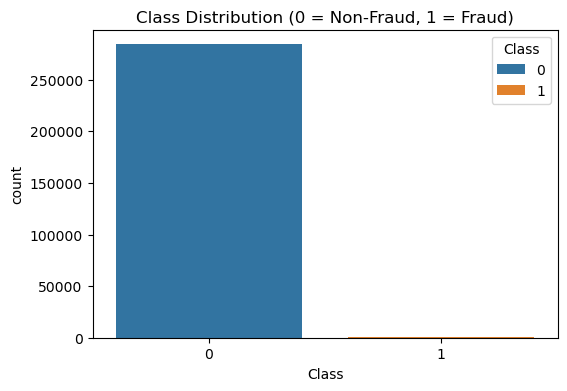

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Corrected countplot code
plt.figure(figsize=(6, 4))
sns.countplot(x='Class', hue='Class', data=df, palette=['#1f77b4', '#ff7f0e'])
plt.title('Class Distribution (0 = Non-Fraud, 1 = Fraud)')
plt.show()


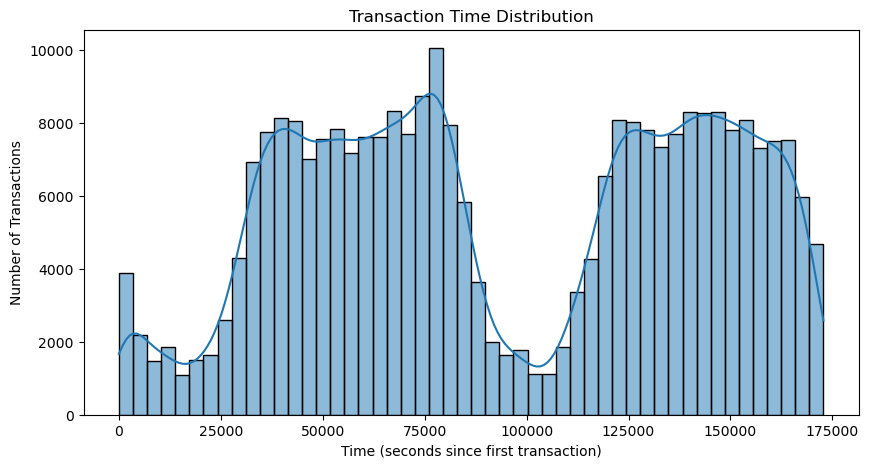

In [8]:
# 2️⃣ Time Analysis
plt.figure(figsize=(10, 5))
sns.histplot(df['Time'], bins=50, kde=True)
plt.title('Transaction Time Distribution')
plt.xlabel('Time (seconds since first transaction)')
plt.ylabel('Number of Transactions')
plt.show()

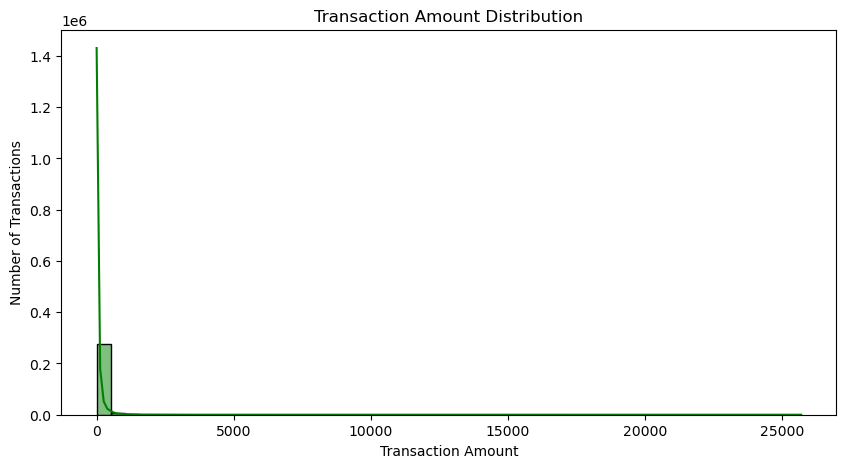

In [9]:
# 3️⃣ Amount Analysis
plt.figure(figsize=(10, 5))
sns.histplot(df['Amount'], bins=50, kde=True, color='green')
plt.title('Transaction Amount Distribution')
plt.xlabel('Transaction Amount')
plt.ylabel('Number of Transactions')
plt.show()


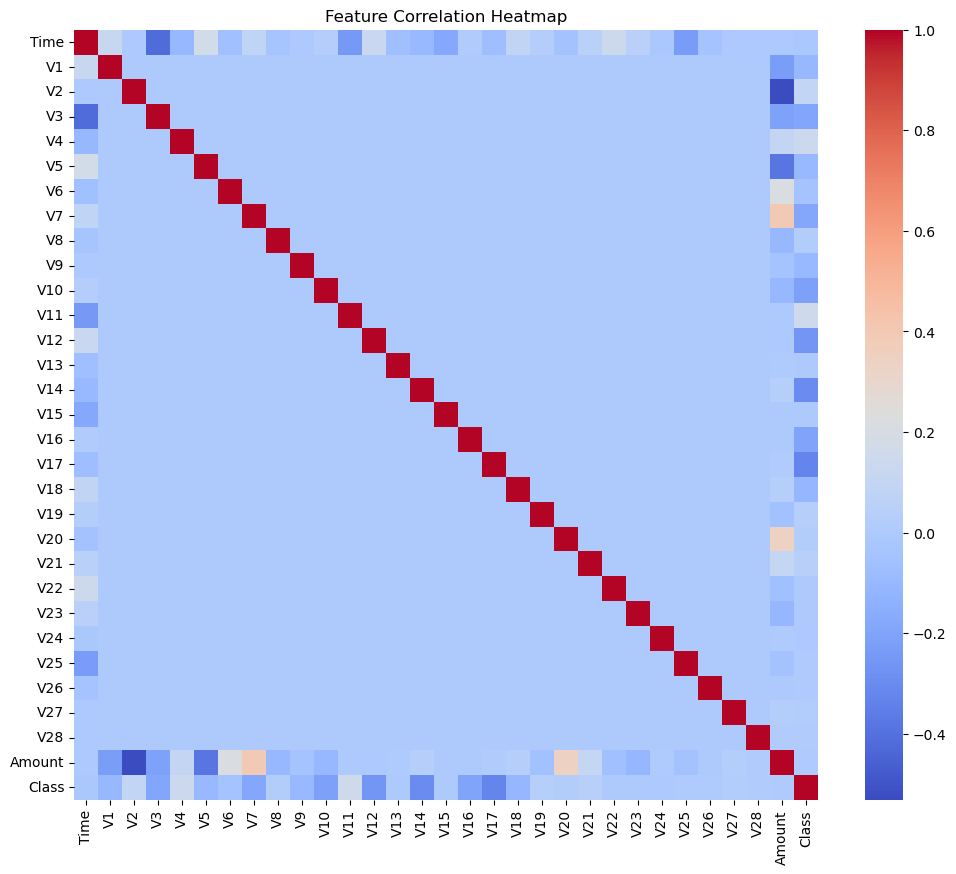

In [10]:
# 4️⃣ Correlation Heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), cmap='coolwarm', annot=False, fmt='.2f')
plt.title('Feature Correlation Heatmap')
plt.show()

C:\Users\dahiw\AppData\Local\Temp\ipykernel_25868\950666023.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Class', y='Amount', data=df, palette=['#1f77b4', '#ff7f0e'])


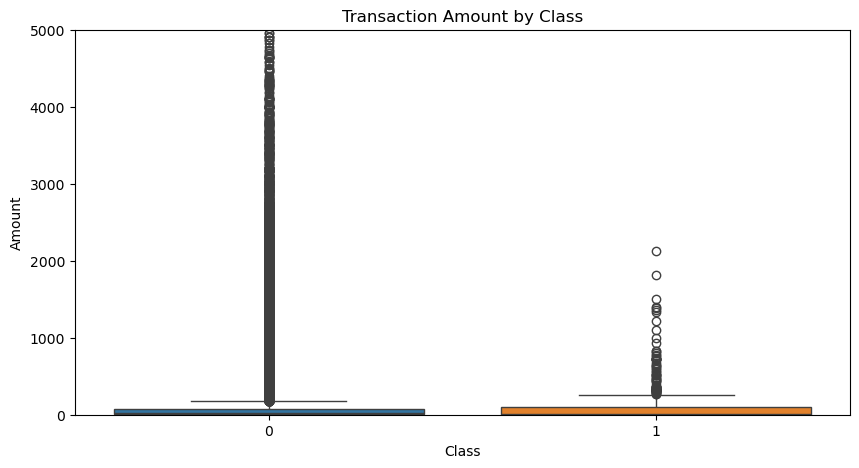

In [11]:
# 5️⃣ Fraud vs Non-Fraud Amount Distribution
plt.figure(figsize=(10, 5))
sns.boxplot(x='Class', y='Amount', data=df, palette=['#1f77b4', '#ff7f0e'])
plt.title('Transaction Amount by Class')
plt.ylim(0, 5000)  # Limiting to 5000 for better visibility
plt.show()

In [12]:
# Import necessary libraries
import pandas as pd

# Separate Fraud and Non-Fraud transactions
non_fraud = df[df['Class'] == 0]
fraud = df[df['Class'] == 1]

# Define the numeric columns (V1 to V28, Amount, and Time)
numeric_columns = df.columns[1:-1]

# Apply IQR method to detect outliers
Q1 = non_fraud[numeric_columns].quantile(0.25)
Q3 = non_fraud[numeric_columns].quantile(0.75)
IQR = Q3 - Q1

# Calculate boundaries for outlier detection
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter non-fraud transactions to remove outliers
non_fraud_cleaned = non_fraud[~((non_fraud[numeric_columns] < lower_bound) | 
                                (non_fraud[numeric_columns] > upper_bound)).any(axis=1)]

# Combine back with fraud transactions
df_cleaned = pd.concat([non_fraud_cleaned, fraud]).sort_index()

# Display the size difference
original_size = df.shape[0]
cleaned_size = df_cleaned.shape[0]

original_size, cleaned_size


(284807, 146446)

In [13]:
# Replace the original dataframe with the cleaned version
df = df_cleaned

# Verify the change
print(f"New dataset size: {df.shape}")
print(df.head())


New dataset size: (146446, 31)
   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   
5   2.0 -0.425966  0.960523  1.141109 -0.168252  0.420987 -0.029728  0.476201   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   
5  0.260314 -0.568671  ... -0.208254 -0.559825 -0.026398 -0.371427 -0.232794   

 

In [14]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[['Amount', 'Time']] = scaler.fit_transform(df[['Amount', 'Time']])


In [15]:
from sklearn.model_selection import train_test_split

# Separate features and target
X = df.drop(columns=['Class'])
y = df['Class']

# Perform the train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Display the shape of the splits
print(f"Training set: {X_train.shape}, {y_train.shape}")
print(f"Test set: {X_test.shape}, {y_test.shape}")


Training set: (117156, 30), (117156,)
Test set: (29290, 30), (29290,)


In [16]:
from imblearn.over_sampling import SMOTE

# Initialize SMOTE
smote = SMOTE(random_state=42)

# Apply SMOTE to the training data
X_train, y_train = smote.fit_resample(X_train, y_train)

# Display the new class distribution
print("Class distribution after SMOTE:")
print(y_train.value_counts())


Class distribution after SMOTE:
Class
0    116762
1    116762
Name: count, dtype: int64


In [38]:
from sklearn.ensemble import RandomForestClassifier
# Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [46]:
models = {
    "Random Forest": rf_model,

}
from sklearn.metrics import classification_report, roc_auc_score
# Display Classification Reports
for name, model in models.items():
    print(f"\nModel: {name}")
    print(classification_report(y_test, model.predict(X_test)))
    print(f"ROC-AUC Score: {roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])}")


Model: Random Forest
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     29192
           1       0.98      0.96      0.97        98

    accuracy                           1.00     29290
   macro avg       0.99      0.98      0.98     29290
weighted avg       1.00      1.00      1.00     29290

ROC-AUC Score: 0.9998563346961147


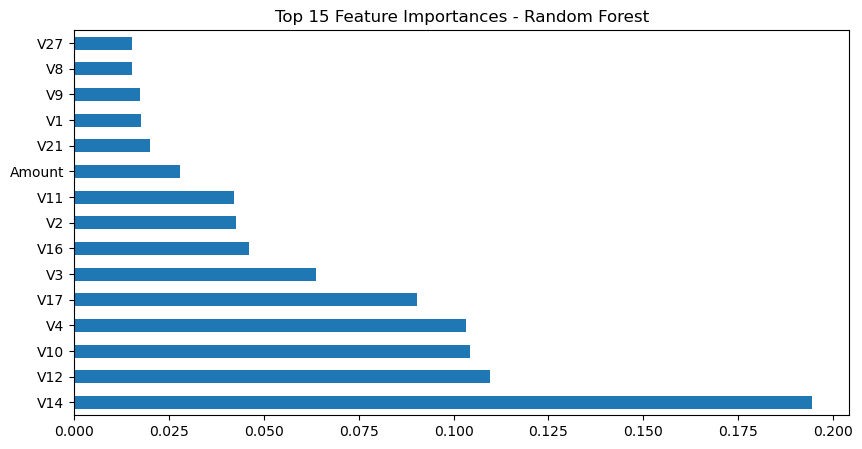

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot Feature Importance for Random Forest
plt.figure(figsize=(10, 5))
feature_importances = pd.Series(rf_model.feature_importances_, index=X.columns)
feature_importances.nlargest(15).plot(kind='barh')
plt.title('Top 15 Feature Importances - Random Forest')
plt.show()

In [52]:
# Retrain Random Forest
from sklearn.ensemble import RandomForestClassifier
rf_model_optimized = RandomForestClassifier(
    n_estimators=20,
    min_samples_split=2,
    min_samples_leaf=4,
    max_features='sqrt',
    max_depth=None,
    bootstrap=False,
    random_state=42
)
rf_model_optimized.fit(X_train, y_train)

RandomForestClassifier(bootstrap=False, min_samples_leaf=4, n_estimators=20,
                       random_state=42)

In [54]:
# Retrain XGBoost
from xgboost import XGBClassifier
xgb_model_optimized = XGBClassifier(
    colsample_bytree=0.7,
    learning_rate=0.2,
    max_depth=5,
    n_estimators=300,
    subsample=0.7,
    random_state=42
)
xgb_model_optimized.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.7, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.2, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=300,
              n_jobs=None, num_parallel_tree=None, ...)

<Figure size 1000x500 with 0 Axes>

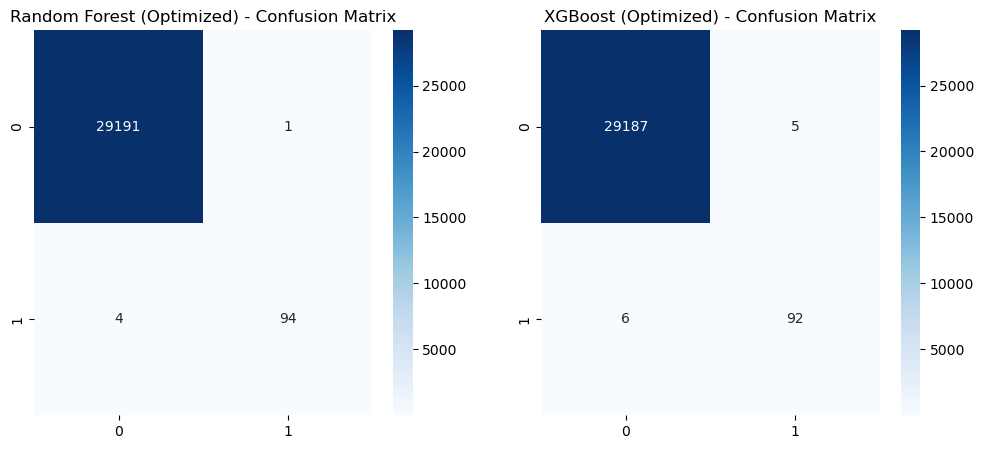

In [56]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

# Models dictionary
models_optimized = {
    "Random Forest (Optimized)": rf_model_optimized,
    "XGBoost (Optimized)": xgb_model_optimized
}

# Plotting Confusion Matrices
plt.figure(figsize=(12, 5))

for i, (name, model) in enumerate(models_optimized.items(), 1):
    plt.subplot(1, 2, i)
    sns.heatmap(confusion_matrix(y_test, model.predict(X_test)), annot=True, fmt='d', cmap='Blues')
    plt.title(f"{name} - Confusion Matrix")

plt.show()

In [58]:
# Display Classification Reports
for name, model in models_optimized.items():
    print(f"\nModel: {name}")
    print(classification_report(y_test, model.predict(X_test)))
    print(f"ROC-AUC Score: {roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])}")


Model: Random Forest (Optimized)
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     29192
           1       0.99      0.96      0.97        98

    accuracy                           1.00     29290
   macro avg       0.99      0.98      0.99     29290
weighted avg       1.00      1.00      1.00     29290

ROC-AUC Score: 0.9997909687305999

Model: XGBoost (Optimized)
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     29192
           1       0.95      0.94      0.94        98

    accuracy                           1.00     29290
   macro avg       0.97      0.97      0.97     29290
weighted avg       1.00      1.00      1.00     29290

ROC-AUC Score: 0.9989674274752378


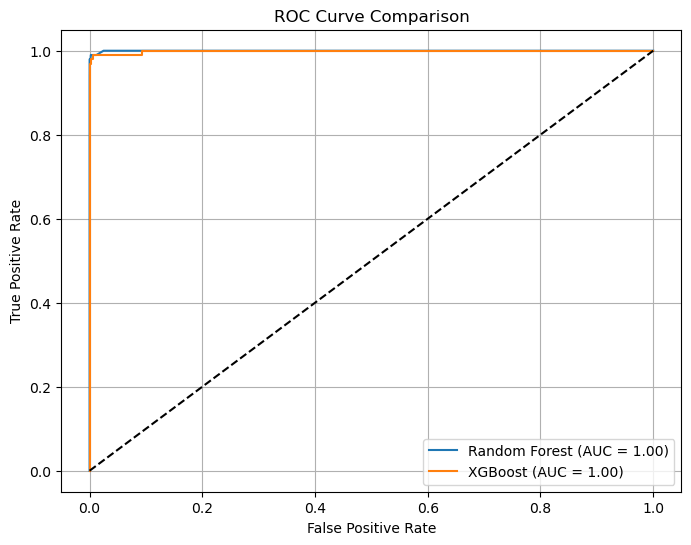

In [60]:
# ROC Curve Plot
plt.figure(figsize=(8, 6))

# Random Forest
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_model_optimized.predict_proba(X_test)[:, 1])
plt.plot(fpr_rf, tpr_rf, label='Random Forest (AUC = {:.2f})'.format(roc_auc_score(y_test, rf_model_optimized.predict_proba(X_test)[:, 1])))

# XGBoost
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, xgb_model_optimized.predict_proba(X_test)[:, 1])
plt.plot(fpr_xgb, tpr_xgb, label='XGBoost (AUC = {:.2f})'.format(roc_auc_score(y_test, xgb_model_optimized.predict_proba(X_test)[:, 1])))

plt.plot([0, 1], [0, 1], 'k--')
plt.title('ROC Curve Comparison')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid(True)
plt.show()


In [69]:
# Select a random sample from the test set
import numpy as np

# Pick a random index
random_index = np.random.randint(0, len(X_test))

# Extract the sample and its true label
sample_data = X_test.iloc[random_index].values.reshape(1, -1)
true_label = y_test.iloc[random_index]

# Display the sample data
print(f"Random Sample Selected (Index: {random_index})")
print(f"True Label: {true_label}")


Random Sample Selected (Index: 16138)
True Label: 0


In [70]:
# Predict using the optimized models
rf_prediction = rf_model_optimized.predict(sample_data)
xgb_prediction = xgb_model_optimized.predict(sample_data)

# Display the predictions
print(f"🌟 Random Forest Prediction: {rf_prediction[0]}")
print(f"🌟 XGBoost Prediction: {xgb_prediction[0]}")


🌟 Random Forest Prediction: 0
🌟 XGBoost Prediction: 0


C:\Users\dahiw\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [71]:
# Example of prediction on a single sample
sample_data = X_test.iloc[5].values.reshape(1, -1)

# Predict with both models
rf_prediction = rf_model_optimized.predict(sample_data)
xgb_prediction = xgb_model_optimized.predict(sample_data)

print(f"Random Forest Prediction: {rf_prediction}")
print(f"XGBoost Prediction: {xgb_prediction}")
print(f"Actual Class: {y_test.iloc[0]}")


Random Forest Prediction: [0]
XGBoost Prediction: [0]
Actual Class: 0


C:\Users\dahiw\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [72]:
# Re-import necessary libraries
from sklearn.model_selection import train_test_split

# Perform Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Select 100 random samples from the test set
import numpy as np
random_indices = np.random.choice(X_test.index, size=100, replace=False)
batch_samples = X_test.loc[random_indices]
true_labels = y_test.loc[random_indices]

# Make predictions using both models
rf_predictions = rf_model_optimized.predict(batch_samples)
xgb_predictions = xgb_model_optimized.predict(batch_samples)

# Compare predictions with true labels
import pandas as pd
results = pd.DataFrame({
    'True Label': true_labels.values,
    'Random Forest Prediction': rf_predictions,
    'XGBoost Prediction': xgb_predictions
})

# Calculate accuracy for each model
rf_accuracy = (results['True Label'] == results['Random Forest Prediction']).mean()
xgb_accuracy = (results['True Label'] == results['XGBoost Prediction']).mean()

# Display the results
print(results.head(10))  # Display first 10 samples
print("\nRandom Forest Accuracy on Batch: {:.2f}%".format(rf_accuracy * 100))
print(" XGBoost Accuracy on Batch: {:.2f}%".format(xgb_accuracy * 100))


   True Label  Random Forest Prediction  XGBoost Prediction
0           0                         0                   0
1           0                         0                   0
2           0                         0                   0
3           0                         0                   0
4           0                         0                   0
5           0                         0                   0
6           0                         0                   0
7           0                         0                   0
8           0                         0                   0
9           0                         0                   0

Random Forest Accuracy on Batch: 100.00%
 XGBoost Accuracy on Batch: 100.00%


In [73]:
# Re-import necessary libraries
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Perform Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Select 100 random samples from the test set
random_indices = np.random.choice(X_test.index, size=100, replace=False)
batch_samples = X_test.loc[random_indices]
true_labels = y_test.loc[random_indices]

# Make predictions using both models
rf_predictions = rf_model_optimized.predict(batch_samples)
xgb_predictions = xgb_model_optimized.predict(batch_samples)

# Compare predictions with true labels
results = pd.DataFrame({
    'True Label': true_labels.values,
    'Random Forest Prediction': rf_predictions,
    'XGBoost Prediction': xgb_predictions
})

# Add a column to indicate if the prediction is correct or not
results['RF Correct'] = results['True Label'] == results['Random Forest Prediction']
results['XGB Correct'] = results['True Label'] == results['XGBoost Prediction']

# Count the number of correct and incorrect predictions
rf_correct_counts = results['RF Correct'].value_counts()
xgb_correct_counts = results['XGB Correct'].value_counts()

In [74]:
# Plot the results
plt.figure(figsize=(10, 4))

# Random Forest
plt.subplot(1, 2, 1)
sns.barplot(x=rf_correct_counts.index, y=rf_correct_counts.values, palette='viridis')
plt.title('Random Forest - Prediction Accuracy')
plt.xlabel('Correct Prediction')
plt.ylabel('Count')
plt.xticks([0, 1], ['Wrong', 'Correct'])

C:\Users\dahiw\AppData\Local\Temp\ipykernel_25868\3279069261.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=rf_correct_counts.index, y=rf_correct_counts.values, palette='viridis')


([<matplotlib.axis.XTick at 0x1cfb7674110>,
 [Text(0, 0, 'Wrong'), Text(1, 0, 'Correct')])